# Examen SQL



## Introduction

Vous allez travailler sur une base de données relationnelle simulant un système de gestion de location. Cette base de données comprend des tables suivantes :

1. **country:** Enregistre les informations relatives aux pays.
2. **city:** Stocke les données sur les villes et établit une liaison avec les pays.
3. **address:** Contient les détails des adresses, y compris la ville associée.
4. **customer:** Enregistre les informations sur les clients, y compris leur adresse et leur statut d'activité.
5. **payment:** Capture les transactions financières liées aux clients, au personnel et aux locations.
6. **rental:** Enregistre les détails des locations, y compris les dates et les personnes impliquées.
7. **staff:** Gère les informations sur le personnel, y compris l'adresse, le magasin, et les informations de connexion.
8. **store:** Stocke les détails des magasins, avec un lien vers le personnel de gestion.

Voici le schéma de cette base de données :

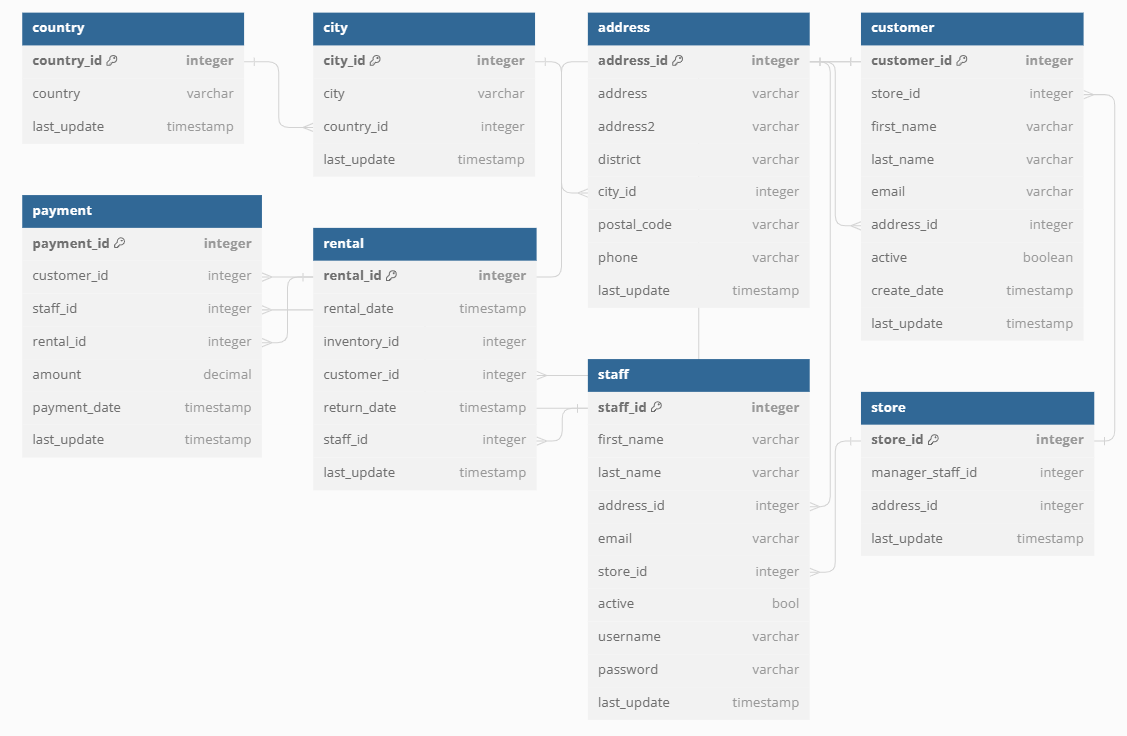

Pour l'examen, utilisez la base de données `data.db`

## Exemple de requête

Voici un exemple de requête utilisant `sqlite3` et `pandas` :

In [3]:
from sqlite3 import connect
import pandas as pd

In [4]:
conn = connect('/content/data.db')

query = """
SELECT *
FROM payment
LIMIT 5
"""

pd.read_sql(query, conn)

DatabaseError: Execution failed on sql '
SELECT *
FROM payment
LIMIT 5
': database disk image is malformed

## Question 1

 Affichez le nombre de location enregistrées avant le 1er Août 2005.

In [5]:
conn = connect('/content/data.db')

query = """
SELECT COUNT(*) AS number_of_rentals_before_august_2005
FROM rental
WHERE rental_date < "2005-08-01"
"""

pd.read_sql(query, conn)

,number_of_rentals_before_august_2005
0,10176


## Question 2

Affichez les 10 clients les plus anciens, ordonnés par date d'enregistrement.

In [6]:
conn = connect('/content/data.db')

query = """
SELECT *
FROM customer
ORDER BY create_date
LIMIT 10
"""

pd.read_sql(query, conn)

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2020-12-23 07:15:11
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36.000,2020-12-23 07:15:11
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2020-12-23 07:15:11
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36.000,2020-12-23 07:15:11
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36.000,2020-12-23 07:15:11
5,6,2,JENNIFER,DAVIS,JENNIFER.DAVIS@sakilacustomer.org,10,1,2006-02-14 22:04:36.000,2020-12-23 07:15:11
6,7,1,MARIA,MILLER,MARIA.MILLER@sakilacustomer.org,11,1,2006-02-14 22:04:36.000,2020-12-23 07:15:11
7,8,2,SUSAN,WILSON,SUSAN.WILSON@sakilacustomer.org,12,1,2006-02-14 22:04:36.000,2020-12-23 07:15:11
8,9,2,MARGARET,MOORE,MARGARET.MOORE@sakilacustomer.org,13,1,2006-02-14 22:04:36.000,2020-12-23 07:15:11
9,10,1,DOROTHY,TAYLOR,DOROTHY.TAYLOR@sakilacustomer.org,14,1,2006-02-14 22:04:36.000,2020-12-23 07:15:11


## Question 3

Affichez le nombre de client actifs et inactifs.

In [7]:
conn = connect('/content/data.db')

query = """
SELECT COUNT(*) As statue_of_customer
FROM customer
GROUP BY active
"""

pd.read_sql(query, conn)

,statue_of_customer
0,15
1,584


## Question 4

Listez les clients avec leurs noms et identifiants, ainsi que les informations sur leurs locations, triées par date de location de manière décroissante. Incluez tous les clients, même ceux qui n'ont effectué aucune location.

In [8]:
conn = connect('/content/data.db')

query = """
SELECT c.customer_id, first_name, last_name, rental_id, rental_date
FROM customer c
LEFT JOIN rental r on c.customer_id = r.customer_id
ORDER BY rental_date DESC NULLS LAST
"""

pd.read_sql(query, conn)

,customer_id,first_name,last_name,rental_id,rental_date
0,5,ELIZABETH,BROWN,13209,2006-02-14 15:16:03.000
1,9,MARGARET,MOORE,15813,2006-02-14 15:16:03.000
2,11,LISA,ANDERSON,11646,2006-02-14 15:16:03.000
3,14,BETTY,WHITE,13780,2006-02-14 15:16:03.000
4,15,HELEN,HARRIS,13798,2006-02-14 15:16:03.000
...,...,...,...,...,...
16039,222,DELORES,HANSEN,5,2005-05-24 23:05:21.000
16040,333,ANDREW,PURDY,4,2005-05-24 23:04:41.000
16041,408,MANUEL,MURRELL,3,2005-05-24 23:03:39.000
16042,459,TOMMY,COLLAZO,2,2005-05-24 22:54:33.000


## Question 5

Trouvez le prénom, le nom et le montant total dépensé par chaque client, classé par ordre décroissant du montant total. Affichez les dix premiers résultats.

In [9]:
conn = connect('/content/data.db')

query = """
SELECT c.first_name, c.last_name, SUM(amount) AS montant_total
FROM customer c
LEFT JOIN payment p ON c.customer_id = p.customer_id
GROUP BY(c.customer_id)
ORDER BY SUM(amount) DESC
LIMIT 10
"""

pd.read_sql(query, conn)

,first_name,last_name,montant_total
0,KARL,SEAL,221.55
1,ELEANOR,HUNT,216.54
2,CLARA,SHAW,195.58
3,RHONDA,KENNEDY,194.61
4,MARION,SNYDER,194.61
5,TOMMY,COLLAZO,186.62
6,WESLEY,BULL,177.60
7,TIM,CARY,175.61
8,MARCIA,DEAN,175.58
9,ANA,BRADLEY,174.66


## Question 6

Affichez la liste de tous les pays ordonnés par le nombre total de villes qu'ils contiennent. Utilisez la clause WITH pour créer une sous-requête.

In [10]:
conn = connect('/content/data.db')

query = """
WITH CountryCity AS(
  SELECT country_id, COUNT(city) AS nb_city
  FROM city
  GROUP BY country_id
)

SELECT country, nb_city
FROM country c
JOIN CountryCity cc ON cc.country_id = c.country_id
ORDER BY nb_city
"""

pd.read_sql(query, conn)

,country,nb_city
0,Afghanistan,1
1,American Samoa,1
2,Anguilla,1
3,Armenia,1
4,Australia,1
...,...,...
104,Mexico,30
105,Japan,31
106,United States,35
107,China,53


## Question 7

Pour les clients dont les initiales du prénom-nom sont "CB" et résidents aux `United States` ou en `China`, affichez le nombre de paiements réalisés, la moyenne des paiements et le montant total des paiements.

La table de sortie doit contenir 4 colonnes :

* **name** : Concaténation du Prénom et du Nom. Le nom ne doit contenir que la première lettre. Exemple "Claude B."
* **country** : Pays de résidence de l'individu.
* **nb_payment** : Le nombre de paiements effectués par l'individu.
* **average_payment** : La moyenne des paiements, arrondie à 2 décimale.
* **total_payment** : Le montant total des paiements.

In [11]:
conn = connect('/content/data.db')

query = """
WITH CustomerInfo AS (
  SELECT
    c.customer_id,
    c.first_name || ' ' || SUBSTR(c.last_name, 1, 1) || '.' AS name,
    co.country,
    COUNT(p.payment_id) AS nb_payment,
    ROUND(AVG(p.amount), 2) AS average_payment,
    SUM(p.amount) AS total_payment
  FROM customer c
  JOIN address a ON c.address_id = a.address_id
  JOIN city ci ON a.city_id = ci.city_id
  JOIN country co ON ci.country_id = co.country_id
  LEFT JOIN payment p ON c.customer_id = p.customer_id
  WHERE (co.country = 'United States' OR co.country = 'China')
    AND c.first_name LIKE 'C%'
    AND c.last_name LIKE 'B%'
  GROUP BY c.customer_id
)
SELECT name, country, nb_payment, average_payment, total_payment
FROM CustomerInfo
ORDER BY total_payment DESC;
"""

pd.read_sql(query, conn)

,name,country,nb_payment,average_payment,total_payment
0,CHARLIE B.,China,26,4.64,120.74
1,CAROLE B.,United States,30,3.62,108.70
2,CLINTON B.,United States,25,4.15,103.75
3,CHESTER B.,China,24,4.16,99.76
4,CAROLINE B.,United States,15,3.39,50.85
